In [1]:
# import python libraries
import pandas as pd
import numpy as np
import time 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale

In [ ]:
pd.set_option("display.max.columns", None)

In [2]:
listings_df = pd.read_csv('listings.csv')
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [3]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [4]:
listings_df.shape

(3585, 95)

In [5]:
# drop columns that are not useful
droplist=['listing_url','scrape_id','jurisdiction_names','license','thumbnail_url','medium_url','picture_url','xl_picture_url'
        ,'host_thumbnail_url','host_picture_url','neighbourhood_group_cleansed','id', 'host_id', 'latitude', 'longitude',
          'calendar_updated','name','summary','description','experiences_offered','host_url','host_name',
        'host_location','host_neighbourhood','host_verifications','street', 'neighbourhood_cleansed',
        'city','state','market','smart_location', 'country_code','country','amenities','calendar_last_scraped',
         'last_scraped',]
listings_df.drop(droplist, axis=1, inplace=True)
listings_df.shape

(3585, 59)

In [6]:
#check missing percentage of features
missed_total = listings_df.isnull().sum().sort_values(ascending = False)
missed_percent = (listings_df.isnull().sum()/listings_df.isnull().count()).sort_values(ascending = False)
missed_data = pd.concat([missed_total,missed_percent],axis = 1, keys = ['Missed_total','Missed_percent'])
missed_data

,Missed_total,Missed_percent
has_availability,3585,1.000000
square_feet,3529,0.984379
monthly_price,2697,0.752301
weekly_price,2693,0.751185
security_deposit,2243,0.625662
notes,1975,0.550907
interaction,1554,0.433473
access,1489,0.415342
neighborhood_overview,1415,0.394700
host_about,1309,0.365132


In [7]:
listings_df.drop(set(listings_df.columns[listings_df.isnull().mean()>0.2]), axis=1, inplace = True)
listings_df.shape

(3585, 35)

In [8]:
listings_df.describe(include=np.object)

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood,zipcode,is_location_exact,property_type,room_type,bed_type,price,extra_people,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3585,3114,3114,3114,3585,3585,3585,3042,3547,3585,3582,3585,3585,3585,3585,3585,3585,3585,3585,3585
unique,1281,4,52,72,2,2,2,30,43,2,13,3,5,324,51,1,2,4,2,2
top,2015-03-30,within an hour,100%,100%,f,t,t,Allston-Brighton,02116,t,Apartment,Entire home/apt,Real Bed,$150.00,$0.00,f,f,strict,f,f
freq,137,1384,2072,1210,3178,3577,2603,364,388,3080,2612,2127,3453,144,2211,3585,2991,1582,3518,3348


In [9]:
listings_df.host_since.value_counts() 

2015-03-30    137
2009-07-10     79
2013-10-14     61
2014-02-14     59
2014-10-09     50
             ... 
2011-06-01      1
2014-01-09      1
2012-10-16      1
2016-04-15      1
2012-07-30      1
Name: host_since, Length: 1281, dtype: int64

In [10]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 35 columns):
host_since                          3585 non-null object
host_response_time                  3114 non-null object
host_response_rate                  3114 non-null object
host_acceptance_rate                3114 non-null object
host_is_superhost                   3585 non-null object
host_listings_count                 3585 non-null int64
host_total_listings_count           3585 non-null int64
host_has_profile_pic                3585 non-null object
host_identity_verified              3585 non-null object
neighbourhood                       3042 non-null object
zipcode                             3547 non-null object
is_location_exact                   3585 non-null object
property_type                       3582 non-null object
room_type                           3585 non-null object
accommodates                        3585 non-null int64
bathrooms                           3571 

In [11]:
listings_df.head(15)

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,...,availability_60,availability_90,availability_365,number_of_reviews,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,2015-04-15,NaN,NaN,NaN,f,1,1,t,f,Roslindale,...,0,0,0,0,f,f,moderate,f,f,1
1,2012-06-07,within an hour,100%,100%,f,1,1,t,t,Roslindale,...,54,84,359,36,f,t,moderate,f,f,1
2,2009-05-11,within a few hours,100%,88%,t,1,1,t,t,Roslindale,...,46,61,319,41,f,f,moderate,t,f,1
3,2013-04-21,within a few hours,100%,50%,f,1,1,t,f,NaN,...,16,26,98,1,f,f,moderate,f,f,1
4,2014-05-11,within an hour,100%,100%,t,1,1,t,t,Roslindale,...,34,59,334,29,f,f,flexible,f,f,1
5,2016-03-23,within a few hours,100%,95%,t,2,2,t,t,Roslindale,...,28,58,58,8,f,f,flexible,f,f,1
6,2013-05-25,within an hour,98%,96%,f,5,5,t,t,NaN,...,39,69,344,57,f,f,strict,f,f,3
7,2012-08-05,within a few hours,100%,100%,t,2,2,t,t,Roslindale,...,60,90,365,67,f,f,moderate,t,t,2
8,2012-10-24,within an hour,100%,100%,t,1,1,t,t,Roslindale,...,42,72,347,65,f,f,moderate,f,f,1
9,2012-12-18,within an hour,100%,100%,t,2,2,t,t,Roslindale,...,50,80,107,33,f,f,strict,f,f,2


Text(0.5, 1.0, 'Room Type')

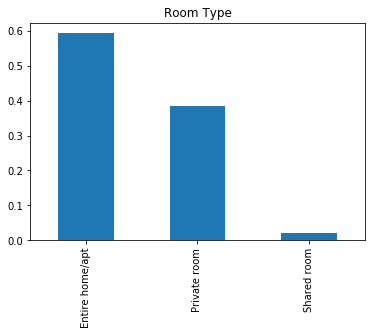

In [12]:
room_type = listings_df.room_type.value_counts()
(room_type/listings_df.shape[0]).plot(kind = 'bar')
plt.title('Room Type')

Text(0, 0.5, 'Count')

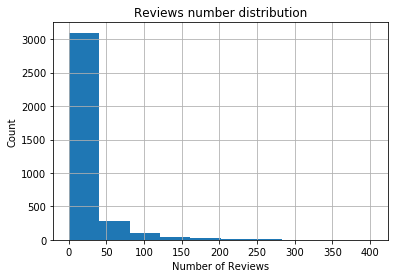

In [13]:
# num of reviews distribution 
listings_df.number_of_reviews.hist()
plt.title('Reviews number distribution')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')

# Data Preparation/ Wrangling
In this step i will handle missing values and categorical variables.

In [14]:
#clean price column, remove "$" and "," sign and return it as float
def right_price(x):
    
    '''
    clean price column, remove "$" and "," sign and return it as float
    '''
    
    try:
        if ',' in x:
            x = x.replace(',','')
        x = x[1:]
        return float(x)
    except:
        return x

In [15]:
listings_df['price'] = listings_df.price.apply(lambda x:right_price(x))
listings_df['extra_people'] = listings_df.extra_people.apply(lambda x:right_price(x))

In [16]:
#handling host_response_time, converting to number 
def response_time_trans(x):
    if x == 'within an hour' or x == 'within a few hours':
        return 1
    elif x == 'within a day':
        return 0.5
    return 0

listings_df['host_response_time'] = listings_df['host_response_time'].apply(response_time_trans)

In [17]:
listings_df['host_response_rate'] = listings_df['host_response_rate'].str[:-1]
listings_df['host_response_rate'] = listings_df['host_response_rate'].astype('float128').astype('Int64')
listings_df['host_acceptance_rate']= listings_df['host_acceptance_rate'].str[:-1]
listings_df['host_response_rate'] = listings_df['host_response_rate'].astype('float128').astype('Int64')

## Q1 Most expansive month to visit Boston?

In [18]:
calender_df = pd.read_csv('calendar.csv')

In [19]:
calender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [20]:
calender_df.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [21]:
calender_df['date'] = pd.to_datetime(calender_df.date)
calender_df['month'] = calender_df.date.dt.month
calender_df['year'] = calender_df.date.dt.year

In [22]:
(calender_df['price'].isna().sum())/calender_df['price'].shape[0]

0.5087157820748879

In [23]:
(calender_df['price'].notna().sum())/calender_df['price'].shape[0]

0.4912842179251121

In [24]:
calender_df['price'] = calender_df['price'].apply(lambda x:right_price(x))

In [25]:
calender_df.groupby(['month','available']).mean()['price']

month  available
1      f                   NaN
       t            182.799671
2      f                   NaN
       t            180.961028
3      f                   NaN
       t            181.818742
4      f                   NaN
       t            197.252890
5      f                   NaN
       t            193.712295
6      f                   NaN
       t            196.535302
7      f                   NaN
       t            202.486309
8      f                   NaN
       t            203.330142
9      f                   NaN
       t            237.047727
10     f                   NaN
       t            233.416248
11     f                   NaN
       t            202.924416
12     f                   NaN
       t            192.601915
Name: price, dtype: float64

## Q2 Most expansive and least expansive Neighbourhood in Boston Airbnb rental price?

Text(0.5, 0, 'Price (dollar)')

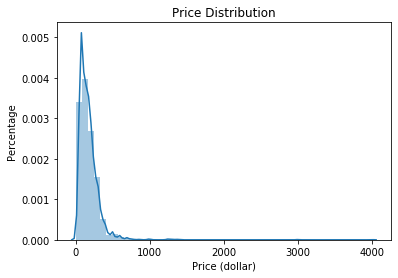

In [26]:
#histogram of price distribution
sns.distplot(listings_df['price'])
plt.title('Price Distribution', fontsize=12)
plt.ylabel('Percentage', fontsize=10)
plt.xlabel('Price (dollar)', fontsize=10)

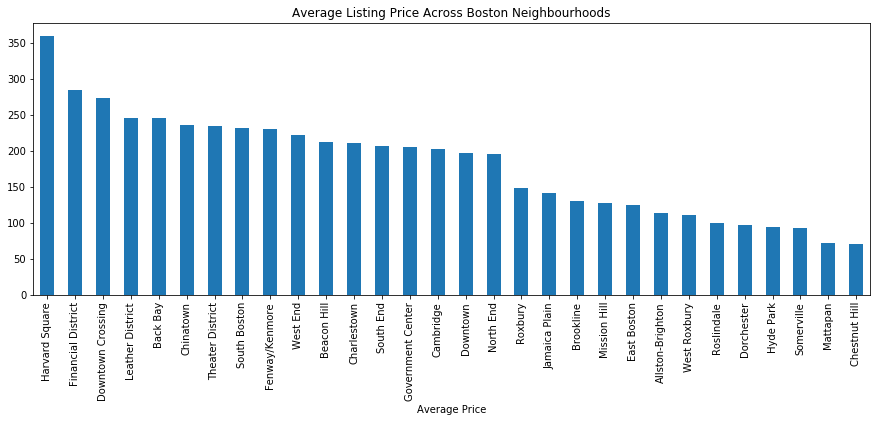

In [27]:
# grouped the listings by neighbourood and get the average price
(listings_df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)).plot(kind="bar", figsize=(15,5));
plt.title("Average Listing Price Across Boston Neighbourhoods");
plt.xlabel('Neighbourhood');
plt.xlabel('Average Price');

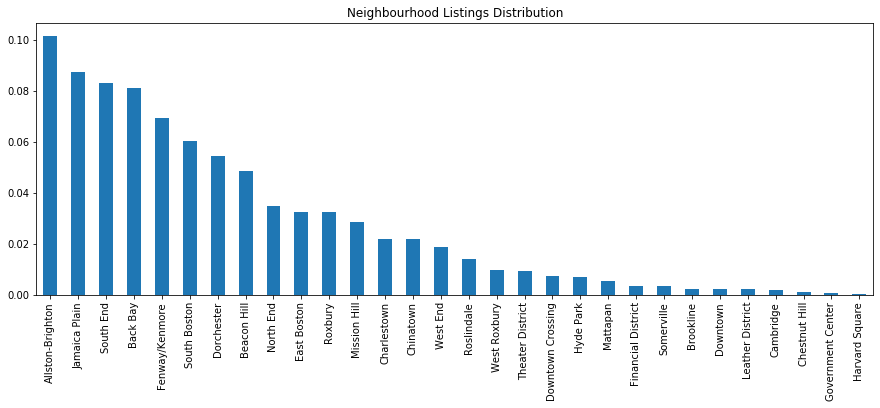

In [28]:
# neighbourhood distribution
neighbourhood = listings_df.neighbourhood.value_counts()

(neighbourhood/listings_df.shape[0]).plot(kind="bar",figsize=(15,5));
plt.title("Neighbourhood Listings Distribution");

Text(0, 0.5, 'Distribution')

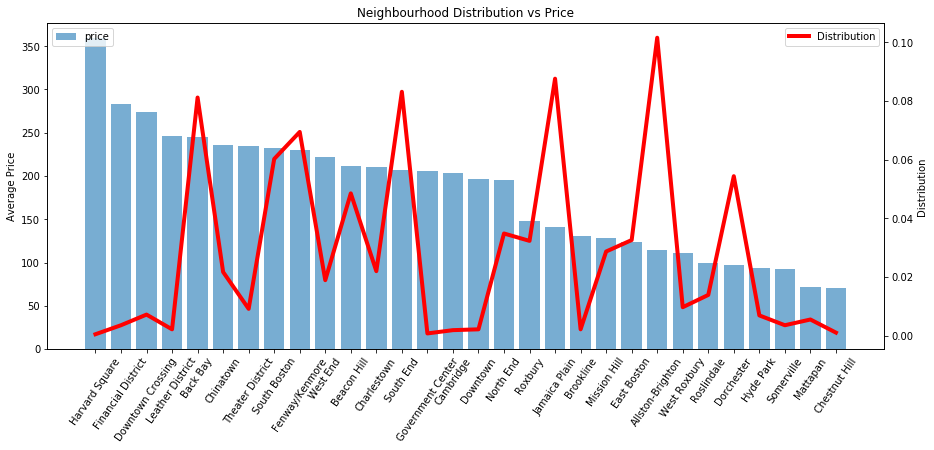

In [29]:
#Check the relationship of Neighbourhood Distribution vs Price
neigh_dist = neighbourhood/listings_df.shape[0]
neigh_price = listings_df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

temp =pd.concat([neigh_price, neigh_dist], axis=1, sort=False)
temp.sort_values(by = 'price',ascending=False, inplace = True)

f, ax = plt.subplots(figsize=(15, 6))
plt.bar(temp.index,temp['price'], label = "price",alpha = 0.6)
plt.grid = (True)
plt.xticks(rotation = 55)
plt.ylabel('Average Price')
plt.legend(loc = 2)
plt.title('Neighbourhood Distribution vs Price')
ax1 = ax.twinx()
plt.plot(temp.index, temp['neighbourhood'], 'r', lw = 4, label = 'Distribution')
plt.legend(loc = 1)
plt.ylabel('Distribution')

## Q3 what feature has the biggest correlation with price?

In [30]:
calender_df

,listing_id,date,available,price,month,year
0,12147973,2017-09-05,f,NaN,9,2017
1,12147973,2017-09-04,f,NaN,9,2017
2,12147973,2017-09-03,f,NaN,9,2017
3,12147973,2017-09-02,f,NaN,9,2017
4,12147973,2017-09-01,f,NaN,9,2017
...,...,...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN,9,2016
1308886,14504422,2016-09-09,f,NaN,9,2016
1308887,14504422,2016-09-08,f,NaN,9,2016
1308888,14504422,2016-09-07,f,NaN,9,2016


In [31]:
#tranlate datetime to count of days 
now = datetime.strptime('2020-09-20','%Y-%m-%d')
listings_df.host_since = listings_df.host_since.apply(lambda x: (now - datetime.strptime(x, '%Y-%m-%d')).days)

In [32]:
listings_df.zipcode.str[:5].astype('float128')

0       2131.0
1       2131.0
2       2131.0
3          NaN
4       2131.0
         ...  
3580    2143.0
3581    2446.0
3582    2141.0
3583    2145.0
3584    2145.0
Name: zipcode, Length: 3585, dtype: float128

In [33]:
listings_df.median()

host_since                        2239.0
host_response_time                   1.0
host_response_rate                 100.0
host_acceptance_rate                94.0
host_listings_count                  2.0
host_total_listings_count            2.0
accommodates                         2.0
bathrooms                            1.0
bedrooms                             1.0
beds                                 1.0
price                              150.0
guests_included                      1.0
extra_people                         0.0
minimum_nights                       2.0
maximum_nights                    1125.0
availability_30                      4.0
availability_60                     16.0
availability_90                     37.0
availability_365                   179.0
number_of_reviews                    5.0
calculated_host_listings_count       2.0
dtype: float64

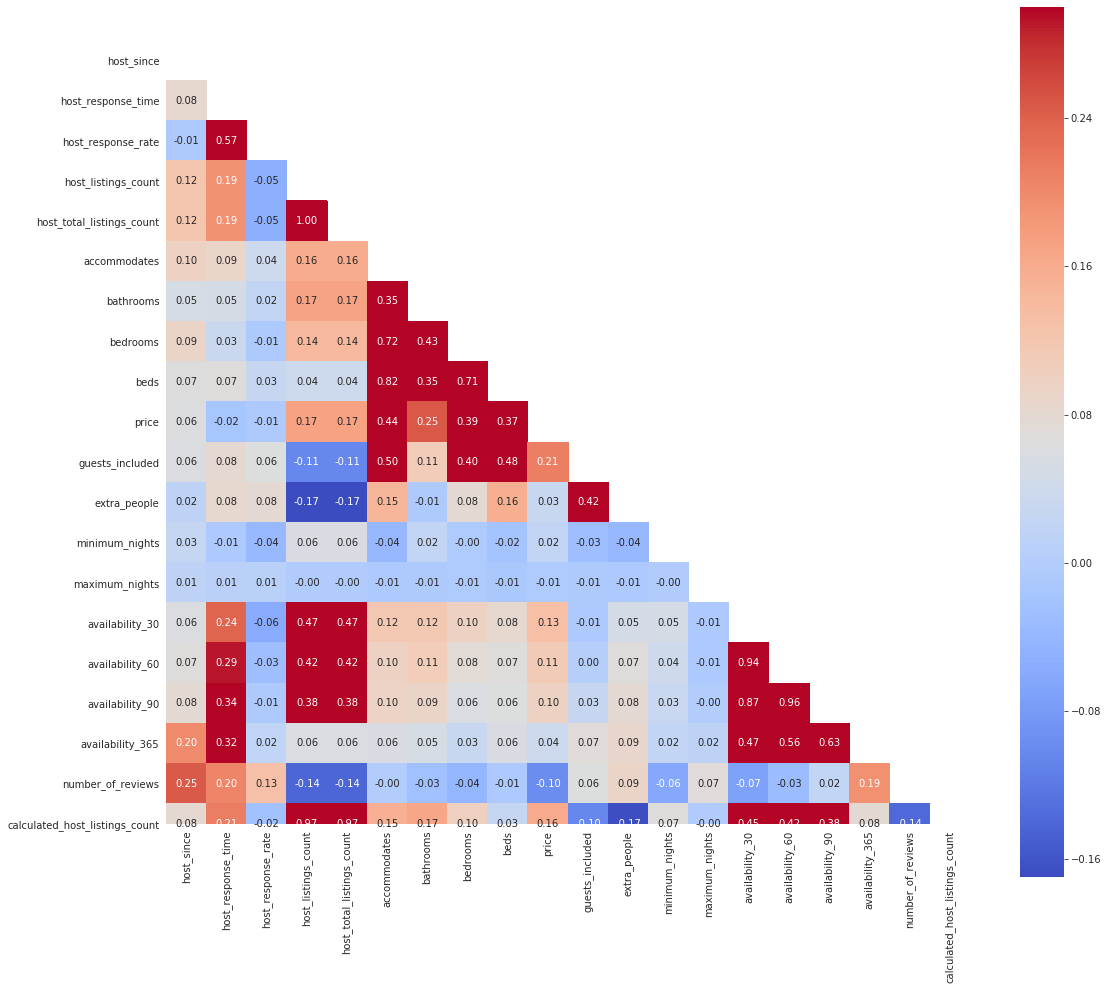

In [34]:
# visualize the correlation matrix
corr = listings_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 16))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, fmt='.2f', cmap='coolwarm')

# summary:

## Q1 Most expansive month to visit Boston?
September is the most expansive month to visit Boston, which has average price of $237. it has the lowest average price on February.

## Q2 Most expansive and least expansive Neighbourhood in Boston Airbnb rental price?
Harvard Square is the most expansive Neighbourhood, and Chestnut Hill is the least expansive Neighbourhood. I futher explore the relationship between Neighbourhood distribution and its price, and we can see from the 'Neighbourhood Distribution vs Price', there is no clear relationship between distribution and price.

## Q3 what feature has the biggest correlation with price?
The accommodates has the biggest correlation with price, and the 2nd and 3rd are bedrooms and beds respectively, which are all related to capacity, so it makes a lot of sense.  